In [48]:
import gymnasium as gym
import cv2
import numpy as np
import matplotlib.pyplot as plt


# env = gym.make("ALE/Breakout-v5", render_mode='rgb_array')
# env = gym.make("ALE/Assault-v5", render_mode='rgb_array')
# env = gym.make("ALE/Solaris-v5", render_mode='rgb_array')
# env = gym.make("ALE/StarGunner-v5", render_mode='rgb_array')
env = gym.make("CarRacing-v2", render_mode='rgb_array')

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 75, 150)
    cv2.imshow('ATARI', edges)
    if cv2.waitKey(10) == 27:
        break
    # plt.imshow(edges); plt.show()
    if terminated or truncated:
        observation, info = env.reset()
    
env.close()
cv2.destroyAllWindows()

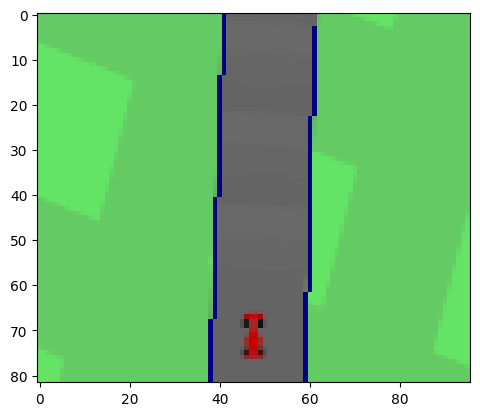

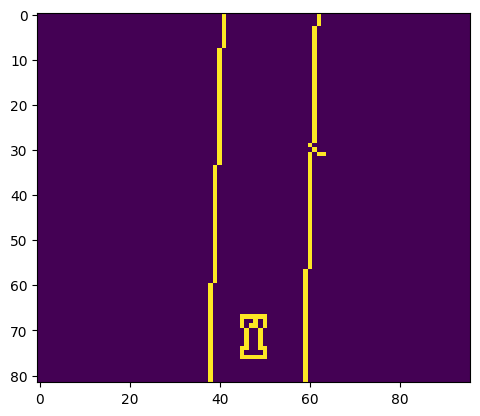

In [73]:
img=observation.copy()[:-14, :]
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=250)
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(img, (x1, y1), (x2, y2), (0, 0, 128), 1)

plt.imshow(img); plt.show()
plt.imshow(edges); plt.show()

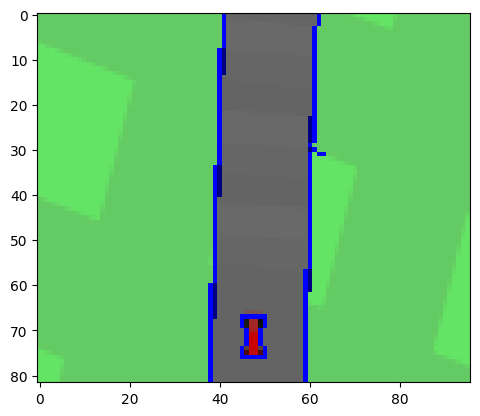

In [74]:
contours, h = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
for c in contours:
    cv2.drawContours(img, c, -1, (0,0,255), thickness = 1)

plt.imshow(img)

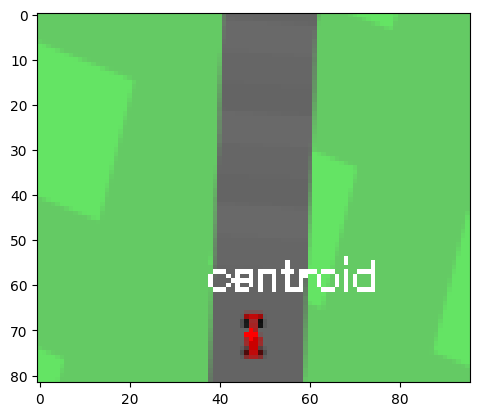

In [76]:
img = observation.copy()[:-14, :]

for c in contours:
    # calculate moments of binary image
    M = cv2.moments(c)
    
    if M['m00'] != 0:
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"]) 
        cY = int(M["m01"] / M["m00"]) 

        # put text and highlight the center
        cv2.circle(img, (cX, cY), 1, (255, 0, 0), -1)
        cv2.putText(img, "centroid", (cX - 10, cY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)
    
# display the image
plt.imshow(img)


In [ ]:
thetas = [-np.pi/2, 0, np.pi/2]

for th in thetas:
    cv2.line(img, (cX, cY), (cX+20*np.cos(th)))